# ENA
v1. 210801
- 대체 노드 위치를 어떻게 고정시킨거지?
    - SVD (to rotate adjacency vector)
    - optimize node & result of SVD using correlation
- 그냥 인접행렬로 네트워크를 그리면 안되나?
- networkX에서 노드 위치 고정하는 방법이 뭐지?

v2. 210803
- 데이터 프레임에서 단순히 열단위로 드랍하기 전에, spherical normalization 추가 필요
- 미래의 지훈이에게..
    - truncated SVD를 통한 4개(과제 개수)의 점 찍기
    - 4개의 co-occurence matrix를 활용하여 그린 네트워크의 무게중심 구하기; how can i get centeriod of network..?

In [43]:
import os, re, datetime
import pandas as pd
import numpy as np
import platform

print(f'작업폴더: {os.getcwd()}')
if 'Darwin' in platform.system():
    df = pd.read_excel('./학교장ENA.xlsx', header = 1)
elif 'Windows' in platform.system():
    cur_dir = os.path.join(os.getcwd())
    df = pd.read_excel(f'{cur_dir}\학교장ENA.xlsx', header = 1)
    # df = pd.read_excel('학교장ENA.xlsx', header = 1)

df.set_index('교장명', inplace=True)
df.drop(columns=df.columns[1], axis=1, inplace=True)
df.drop(df[df.index != '김영익'].index, inplace=True)
df.fillna(0, inplace=True)
df
# df[df[]]

작업폴더: c:\Users\jhun1\Dropbox\[1]2021-summer\8-3


,문제상황,학교 신뢰 훼손,학교운영의 마비,새로운 변화에 대한 저항,시스템 사고,민주적 사고,전략적 사고,효과성 초점,안정성 초점,관계성 초점
교장명,,,,,,,,,,
김영익,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
김영익,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
김영익,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
김영익,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
김영익,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
김영익,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
김영익,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
김영익,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
김영익,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# 문제상황별로 다르게 만들어야함
trngr = np.zeros(shape=(4,44))
print(trngr)
for i in range(4):
    '''slice by task number'''
    temp = df.drop(df[df['문제상황'] != i].index)

    '''make co-occurence matrix'''
    df_int = temp.astype(int) ; del temp
    coocc = df_int.T.dot(df_int) # make cooccurence
    # coocc

    '''spherical normalized'''


    '''append numpy'''
    temp = []
    for idx in range(coocc.shape[0]-1): # make coocc as upper Triangular Matrix
        for col in range(idx, coocc.shape[0]):
            # temp[0, idx*coocc.shape[0]+col] = coocc.iloc[idx, col]
            # temp = np.append(temp, coocc.iloc[idx, col], axis=0) # dim issue 
            temp.append(coocc.iloc[idx+1, col])

    unit = len(temp)
    # temp = np.array(temp).reshape(unit, 1) # (44,1) array
    temp = np.expand_dims(temp, axis= 0) # (1,44) array
    # trngr = np.append(trngr, temp, axis = 0)
    try:
        trngr[i,] = temp
    except:
        print(trngr.shape, temp.shape)

trngr

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(4, 44) (1, 54)
(4, 44) (1, 54)
(4, 44) (1, 54)
(4, 44) (1, 54)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:


print(trngr[:5], trngr.shape, np.var(trngr), '\n\n')

u, s, vh = np.linalg.svd(trngr, full_matrices=True)

print(u, u.shape, '\n',
        s, s.shape, '\n',
        vh, vh.shape)

print('if,,\n',
        np.diag(s), 
        np.var(np.diag(s)))

[[ 0]
 [14]
 [ 1]
 [ 8]
 [ 1]] (44, 1) 14.607438016528926 


[[ 0.         -0.41945506 -0.02996108 ... -0.05992215 -0.05992215
  -0.20972753]
 [ 0.41945506  0.82405745 -0.01256732 ... -0.02513465 -0.02513465
  -0.08797127]
 [ 0.02996108 -0.01256732  0.99910233 ... -0.00179533 -0.00179533
  -0.00628366]
 ...
 [ 0.05992215 -0.02513465 -0.00179533 ...  0.99640934 -0.00359066
  -0.01256732]
 [ 0.05992215 -0.02513465 -0.00179533 ... -0.00359066  0.99640934
  -0.01256732]
 [ 0.20972753 -0.08797127 -0.00628366 ... -0.01256732 -0.01256732
   0.95601436]] (44, 44) 
 [33.37663854] (1,) 
 [[1.]] (1, 1)
if,,
 [[33.37663854]] 0.0


In [33]:
# https://stackoverflow.com/questions/31523575/get-u-sigma-v-matrix-from-truncated-svd-in-scikit-learn
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(trngr,
                          n_components=2,
                          n_iter = 5,  #why?
                          random_state = 41)

Sigma

[2, 0, 0, 0, 0, 1, 1, 1, 0, 14, 1, 8, 1, 3, 6, 2, 3, 4, 0, 0, 0, 2, 0, 0, 13, 1, 4, 5, 3, 3, 5, 0, 1, 1, 4, 10, 6, 3, 0, 15, 0, 1, 6, 2, 7]


array([32.84813541])

In [22]:
len(trngr[0])

72

TypeError: loop of ufunc does not support argument 0 of type dict which has no callable sqrt method

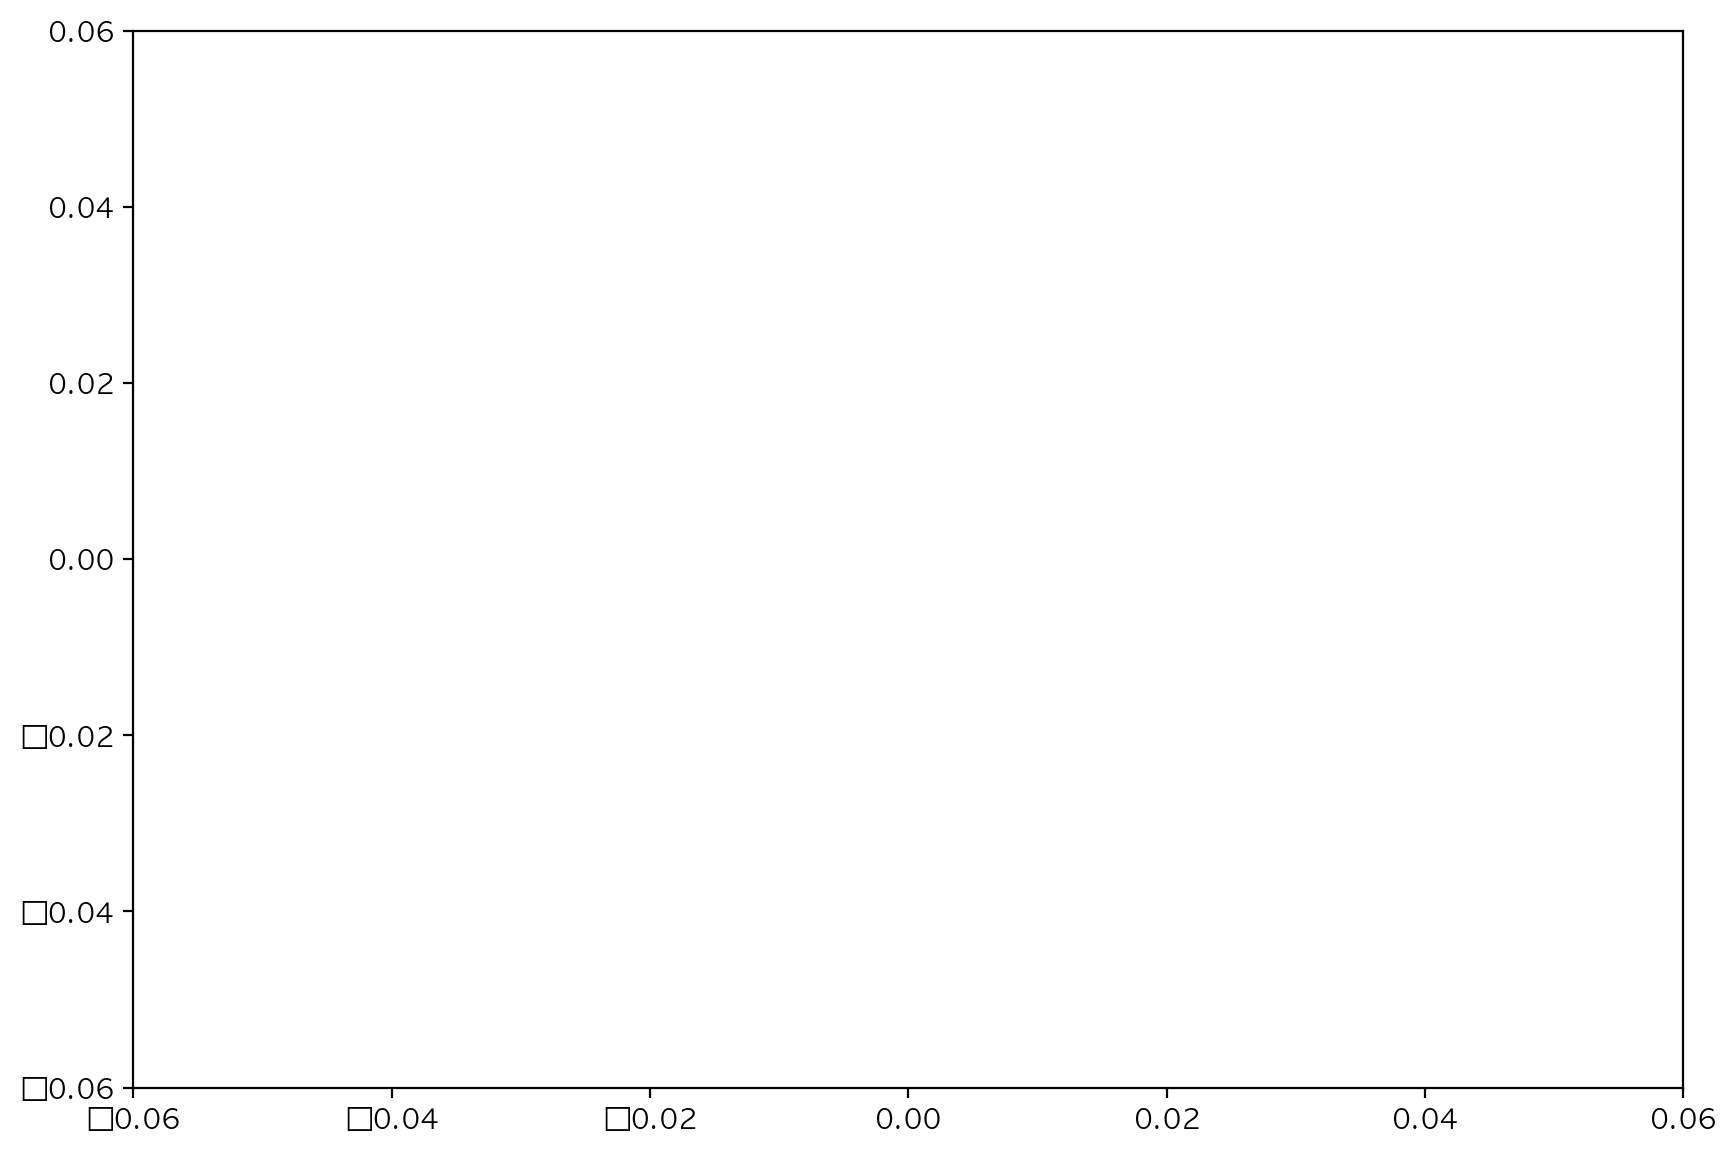

In [41]:
'''
인접행렬은 완성된 상태에서 네트워크 그리기
'''
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# plt.rc('font', family='NanumBarunGothic') # Window
plt.rc('font', family='AppleGothic') # Mac


'''
networkX 에서 인풋으로 받는 형태의 데이터프레임으로 변경
'''
college_ls = list(coocc.columns) 
college_ls

for_network = pd.DataFrame()
for idx, row in coocc.iterrows():
    for college in college_ls:
        temp = [college, idx] # 열에 있는 단과대가 출발점, 행에 있는 단과대가 도착
        weight = row[college]
        temp.append(weight)
        # print(temp)
        df_temp = pd.DataFrame([temp], columns=['from', 'to','weight'])
        for_network = for_network.append(df_temp)

for_network.reset_index(drop=True, inplace=True)
# for_network


'''
예쁘게 그리기
'''
# 데이터를 만져서 'college_size'라는 변수를 만든 코드는 생략하였습니다. 이게 노드 크기가 될거에요
plt.figure(figsize=(10, 7), dpi=200)
plt.margins(x=0.1, y=0.1)

G = nx.from_pandas_edgelist(for_network, source='from', target='to', create_using=nx.DiGraph())
pos = nx.shell_layout(G) # shell_layout은 

# pos = nx.shell_layout(G_rev)  # k = 노드 간 간격을 얼마나 좁게 할지

# node 따로 그리기
node_sz = {}
for col in df.columns.tolist():
    node_sz[col] = df[col].sum()

# try:
nx.draw_networkx_nodes(G, pos, 
                node_size = node_sz, 
                cmap=plt.cm.Blues, alpha=0.5)
# except TypeError:
#     print(node_sz)

# edge 따로 그리기 # weight를 주는 부분을 잘 봐주세요
nx.draw_networkx_edges(
    G, pos, 
    # width = [np.sqrt(weight) for weight in for_network['weight']],
    # width = [np.log(weight) for weight in for_network['weight']],
    width = [weight for weight in for_network['weight']],
    edge_cmap=plt.cm.Greys, 
    alpha = 0.3,
)

nx.draw_networkx_labels(
    G, pos, font_family='AppleGothic', font_color='black', font_size=10, font_weight='bold'
)

plt.show(G)